**Membaca Gambar Menggunakan OpenCV**

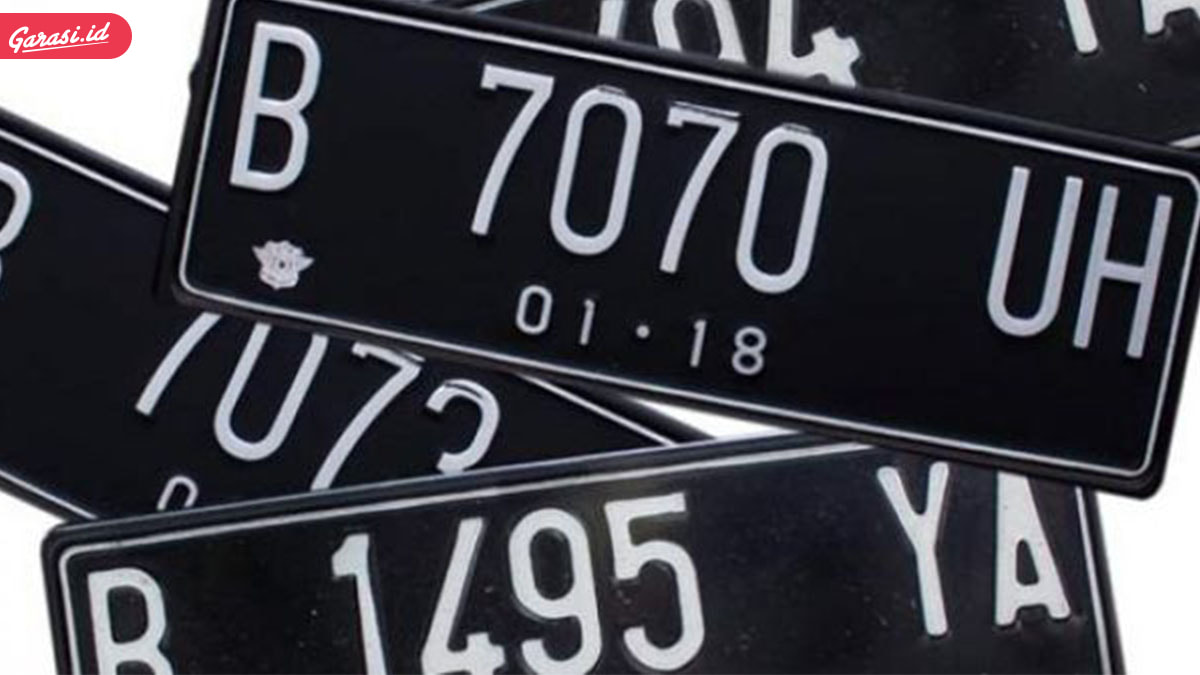

In [146]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread("/content/plat.jpeg")
cv2_imshow(img)

**Membaca Gambar Menggunakan PIL**

In [147]:
from PIL import Image

# Read the image
im = Image.open("/content/plat.jpeg")

# Show image
im.show()

In [148]:
import matplotlib.pyplot as plt

**Edge Detection Sobel**

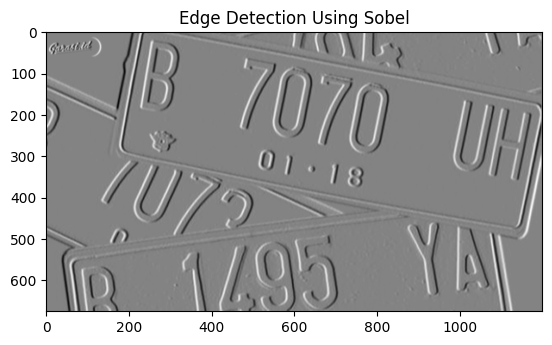

In [149]:
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(grayscale_img,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(grayscale_img,cv2.CV_64F,0,1,ksize=9)

plt.imshow(sobelx,cmap = 'gray')
plt.title("Edge Detection Using Sobel")
plt.show()

**Edge Detection Canny**

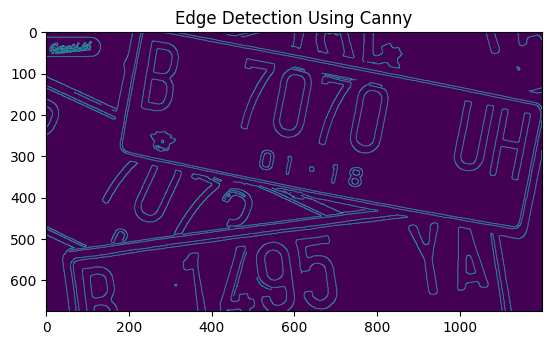

In [150]:
threshold1 = 30
threshold2 = 200

canny = cv2.Canny(grayscale_img, threshold1, threshold2)

plt.imshow(canny)
plt.title("Edge Detection Using Canny")
plt.show()

**Random Cropping**

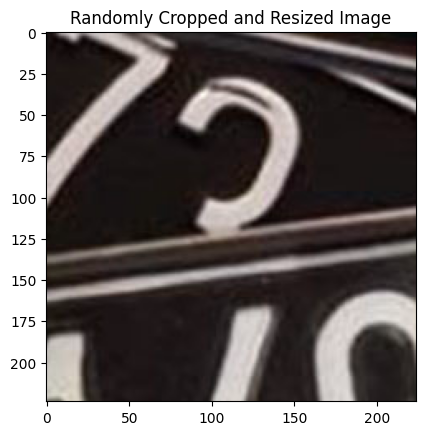

In [151]:
import numpy as np

image_size = (224, 224)

crop_percent = 0.2

crop_min = int(img.shape[0] * crop_percent)
crop_max = int(img.shape[0] - crop_min)

y_start = np.random.randint(crop_min, crop_max)
x_start = np.random.randint(crop_min, crop_max)

cropped_image = img[y_start:y_start + image_size[0], x_start:x_start + image_size[1]]
resized_image = Image.fromarray(cropped_image).resize(image_size)

plt.imshow(resized_image)
plt.title("Randomly Cropped and Resized Image")
plt.show()

**Half Size Center Cropping**

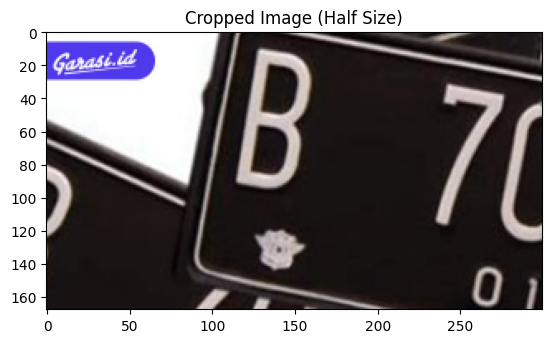

In [152]:
original_height, original_width = img.shape[:2]

resized_image = cv2.resize(img, (original_width // 2, original_height // 2), interpolation=cv2.INTER_AREA)

x = 0
y = 0
cropped_width = original_width // 4
cropped_height = original_height // 4

cropped_image = resized_image[y:y+cropped_height, x:x+cropped_width]

plt.imshow(cropped_image)
plt.title("Cropped Image (Half Size)")
plt.show()

**Binary**

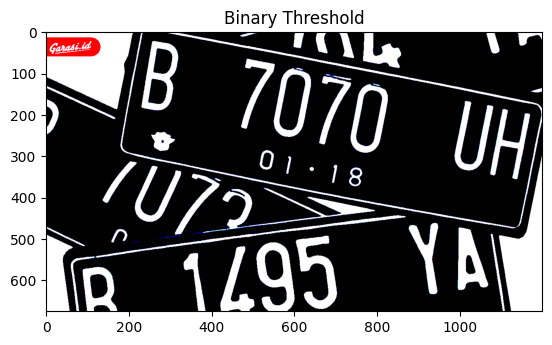

In [153]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)

plt.imshow(thresh_rgb)
plt.title("Binary Threshold")
plt.show()

**Inverse Binary**

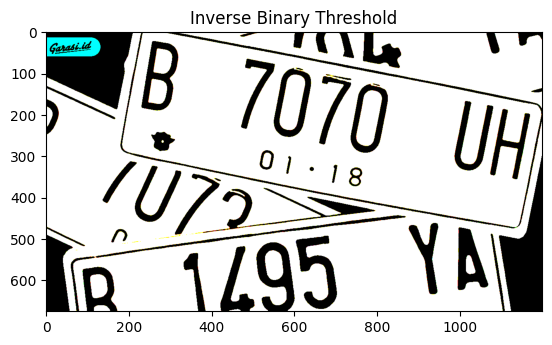

In [154]:
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

thresh_rgb2 = cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB)

plt.imshow(thresh_rgb2)
plt.title("Inverse Binary Threshold")
plt.show()

**Salt And Pepper Noise**

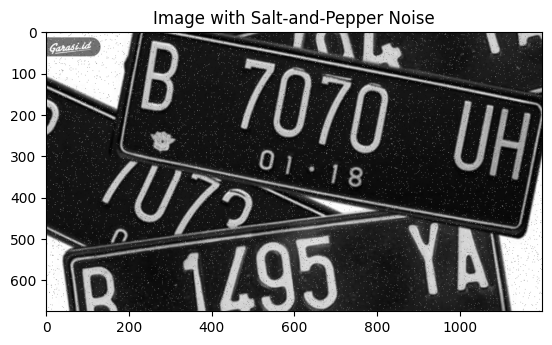

In [155]:
import random

def add_salt_and_pepper_noise(image):
    height, width = image.shape
    num_salt_pixels = int(height * width * 0.01)
    num_pepper_pixels = int(height * width * 0.01)

    noisy_image = image.copy()

    for _ in range(num_salt_pixels):
        y_coord = random.randint(0, height - 1)
        x_coord = random.randint(0, width - 1)
        noisy_image[y_coord, x_coord] = 255

    for _ in range(num_pepper_pixels):
        y_coord = random.randint(0, height - 1)
        x_coord = random.randint(0, width - 1)
        noisy_image[y_coord, x_coord] = 0

    return noisy_image

noisy_image = add_salt_and_pepper_noise(grayscale_img)

noisy_image_rgb = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

plt.imshow(noisy_image_rgb)
plt.title("Image with Salt-and-Pepper Noise")
plt.show()

**Gaussian Noise**

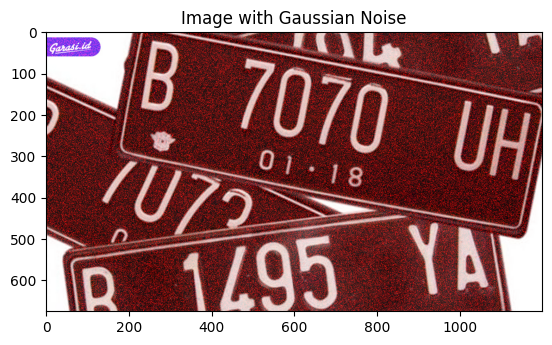

In [156]:
mean = 0
stddev = 180
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)

noisy_img = cv2.add(img, noise)

plt.imshow(noisy_img)
plt.title("Image with Gaussian Noise")
plt.show()

**Rotated Image**

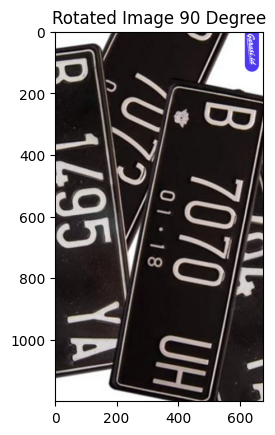

In [157]:
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(rotated_img)
plt.title("Rotated Image 90 Degree")
plt.show()

**Vertical Flip**

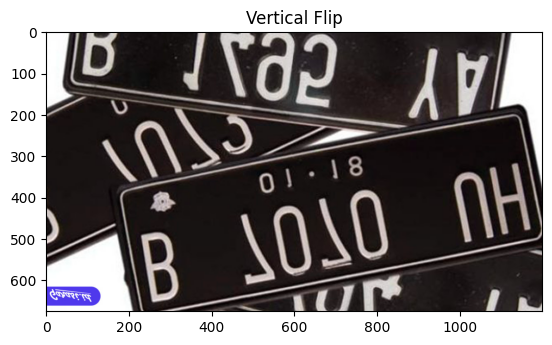

In [158]:
flipped_img = cv2.flip(img, 0)

plt.imshow(flipped_img)
plt.title("Vertical Flip")
plt.show()

**Horizontal Flip**

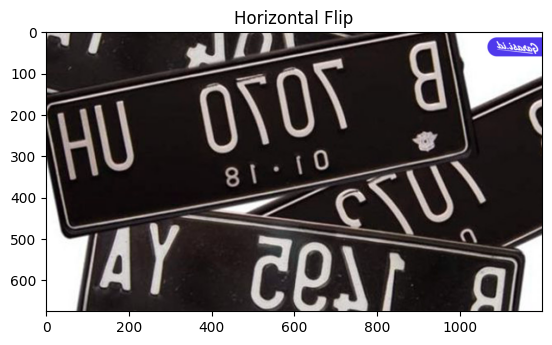

In [159]:
flipped_img = cv2.flip(img, 1)

plt.imshow(flipped_img)
plt.title("Horizontal Flip")
plt.show()